In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataFrame = pd.read_excel("merc.xlsx")
# get data set

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()
# ornegin, year kategorisinde kac tane null veri var, onu dondurur
# bu sette null veri bulunmamaktadir.

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\ecem\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

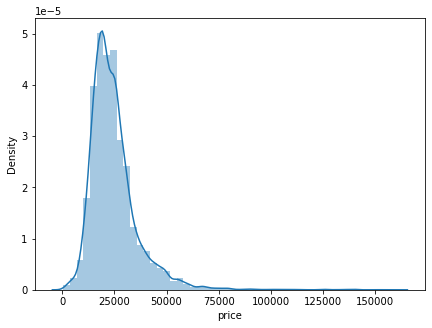

In [6]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])
# distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

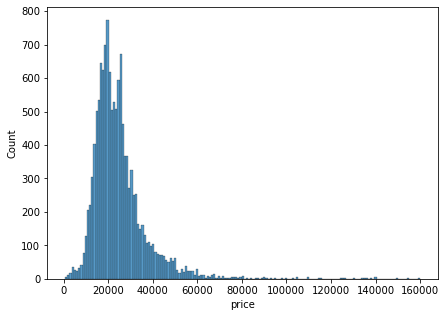

In [7]:
plt.figure(figsize=(7,5))
sbn.histplot(dataFrame["price"])

C:\Users\ecem\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

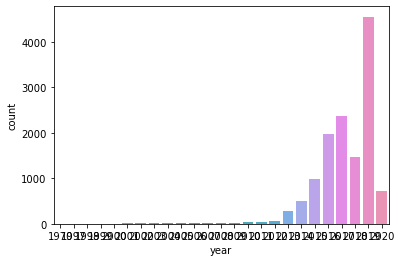

In [11]:
sbn.countplot(dataFrame["year"])
# get count of cars by grouping by their year

In [16]:
dataFrame.corr()
# correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.
# it's a common tool for describing simple relationships without making a statement about cause and effect.
# the values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement.
# if corr = -1 -> negative correlation
# if corr = 1 -> positive correlation
# if corr = 0 -> no correlation

# korelasyon analizi sayısal veya kategorik değişkenler arasında istatistiksel olarak bir ilişkinin var olup olmadığını test etmek için kullanılır. (nedensellik aranmaz)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [18]:
dataFrame.corr()["price"].sort_values()
# price'in diger kategoriler ile iliskisi

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

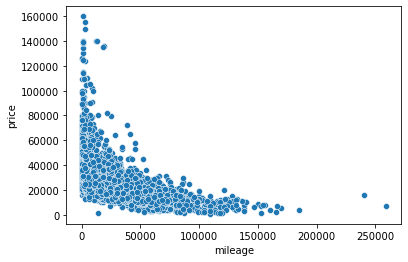

In [21]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)
# when mileage increases, price decreases. it makes sense

In [22]:
dataFrame.sort_values("price",ascending=False).head(10)
# en yuksek fiyatli 10 araba
# when ascending = False, decreasing form

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [23]:
dataFrame.sort_values("price",ascending=True).head(10)
# increasing form
# en dusuk fiyatli 10 araba

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [28]:
print(len(dataFrame))
print("%0.01 -->",len(dataFrame) *0.01)
# en yuksek fiyatli arabalari data setimizden cikaracagiz
# bunu grafikten anladik, grafikte absurd pahali arabalar oldugu icin tahmini bozabilir.
# bu yuzden cikariyoruz, %0.01'ini cikarsak bir problem olmaz

13119
%0.01 --> 131.19


In [31]:
newDataFrame = dataFrame.sort_values("price",ascending=False).iloc[131:]
# iloc --> starting from 131 to end

In [32]:
newDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\ecem\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

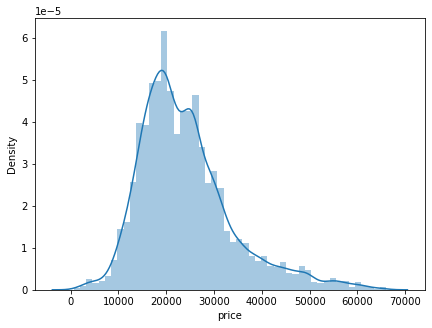

In [34]:
plt.figure(figsize=(7,5))
sbn.distplot(newDataFrame["price"])

<Figure size 504x360 with 0 Axes>

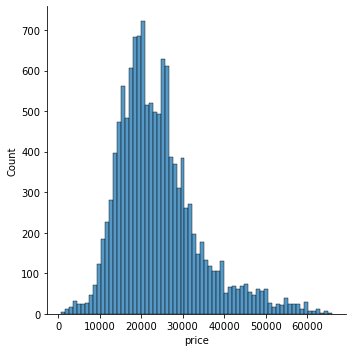

In [35]:
plt.figure(figsize=(7,5))
sbn.displot(newDataFrame["price"])

In [40]:
dataFrame.groupby("year").mean()["price"]
# get mean of cars by grouping them by their year

#1970 verisinin butunlugu bozdugu gorulebilir

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [41]:
newDataFrame.groupby("year").mean()["price"]
# en yuksek fiyatlari cikararak olusturdugumuz df'de de 1970 verisi bulunuyor

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [42]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]
# 1970 verisini cikarabiliriz

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [45]:
dataFrame = newDataFrame
# update the dataFrame

In [46]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [47]:
dataFrame = dataFrame[dataFrame.year!=1970]
# delete the 1970's data

In [48]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [49]:
dataFrame.head()
# we can also delete the "transmission" data

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [50]:
dataFrame = dataFrame.drop("transmission",axis=1)

In [52]:
dataFrame.head()
# now, data is ready

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [53]:
y = dataFrame["price"].values # output
x = dataFrame.drop("price",axis=1).values # input

In [54]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [55]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=10)

In [58]:
len(x_train)

9090

In [59]:
len(x_test)

3897

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
x_train = scaler.fit_transform(x_train)
# fit and transform

In [63]:
x_test = scaler.transform(x_test)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
x_train.shape

(9090, 5)

In [68]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [70]:
model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 0s 3ms/step - loss: 672140544.0000 - val_loss: 688092608.0000
Epoch 2/300
37/37 [==============================] - 0s 676us/step - loss: 672105472.0000 - val_loss: 688036288.0000
Epoch 3/300
37/37 [==============================] - 0s 676us/step - loss: 672003328.0000 - val_loss: 687853888.0000
Epoch 4/300
37/37 [==============================] - 0s 676us/step - loss: 671667840.0000 - val_loss: 687263296.0000
Epoch 5/300
37/37 [==============================] - 0s 649us/step - loss: 670624704.0000 - val_loss: 685501376.0000
Epoch 6/300
37/37 [==============================] - 0s 676us/step - loss: 667734400.0000 - val_loss: 680888384.0000
Epoch 7/300
37/37 [==============================] - 0s 703us/step - loss: 660738176.0000 - val_loss: 670411392.0000
Epoch 8/300
37/37 [==============================] - 0s 676us/step - loss: 645941184.0000 - val_loss: 649617088.0000
Epoch 9/300
37/37 [==============================] - 0s 649us/step

37/37 [==============================] - 0s 811us/step - loss: 60695688.0000 - val_loss: 61958164.0000
Epoch 72/300
37/37 [==============================] - 0s 730us/step - loss: 60035428.0000 - val_loss: 61340720.0000
Epoch 73/300
37/37 [==============================] - 0s 865us/step - loss: 59370100.0000 - val_loss: 60652296.0000
Epoch 74/300
37/37 [==============================] - 0s 730us/step - loss: 58699904.0000 - val_loss: 59985012.0000
Epoch 75/300
37/37 [==============================] - 0s 757us/step - loss: 58021036.0000 - val_loss: 59305260.0000
Epoch 76/300
37/37 [==============================] - 0s 730us/step - loss: 57352464.0000 - val_loss: 58600264.0000
Epoch 77/300
37/37 [==============================] - 0s 730us/step - loss: 56645596.0000 - val_loss: 57919436.0000
Epoch 78/300
37/37 [==============================] - 0s 703us/step - loss: 55924400.0000 - val_loss: 57180396.0000
Epoch 79/300
37/37 [==============================] - 0s 703us/step - loss: 55199644.

37/37 [==============================] - 0s 676us/step - loss: 22731564.0000 - val_loss: 23740192.0000
Epoch 142/300
37/37 [==============================] - 0s 676us/step - loss: 22602278.0000 - val_loss: 23609886.0000
Epoch 143/300
37/37 [==============================] - 0s 703us/step - loss: 22480436.0000 - val_loss: 23485310.0000
Epoch 144/300
37/37 [==============================] - 0s 703us/step - loss: 22354312.0000 - val_loss: 23374064.0000
Epoch 145/300
37/37 [==============================] - 0s 676us/step - loss: 22223980.0000 - val_loss: 23267802.0000
Epoch 146/300
37/37 [==============================] - 0s 676us/step - loss: 22118944.0000 - val_loss: 23157354.0000
Epoch 147/300
37/37 [==============================] - 0s 757us/step - loss: 22047378.0000 - val_loss: 23100788.0000
Epoch 148/300
37/37 [==============================] - 0s 704us/step - loss: 21898968.0000 - val_loss: 22975078.0000
Epoch 149/300
37/37 [==============================] - 0s 703us/step - loss: 2

37/37 [==============================] - 0s 865us/step - loss: 19619448.0000 - val_loss: 21148112.0000
Epoch 212/300
37/37 [==============================] - 0s 676us/step - loss: 19565292.0000 - val_loss: 21075282.0000
Epoch 213/300
37/37 [==============================] - 0s 676us/step - loss: 19547454.0000 - val_loss: 21063194.0000
Epoch 214/300
37/37 [==============================] - 0s 676us/step - loss: 19551690.0000 - val_loss: 21052816.0000
Epoch 215/300
37/37 [==============================] - 0s 649us/step - loss: 19535092.0000 - val_loss: 21037876.0000
Epoch 216/300
37/37 [==============================] - 0s 676us/step - loss: 19528402.0000 - val_loss: 21025654.0000
Epoch 217/300
37/37 [==============================] - 0s 676us/step - loss: 19494574.0000 - val_loss: 21003818.0000
Epoch 218/300
37/37 [==============================] - 0s 676us/step - loss: 19486426.0000 - val_loss: 20994560.0000
Epoch 219/300
37/37 [==============================] - 0s 649us/step - loss: 1

37/37 [==============================] - 0s 703us/step - loss: 18626102.0000 - val_loss: 20101220.0000
Epoch 282/300
37/37 [==============================] - 0s 703us/step - loss: 18626276.0000 - val_loss: 20096136.0000
Epoch 283/300
37/37 [==============================] - 0s 730us/step - loss: 18636388.0000 - val_loss: 20073124.0000
Epoch 284/300
37/37 [==============================] - 0s 730us/step - loss: 18600720.0000 - val_loss: 20065802.0000
Epoch 285/300
37/37 [==============================] - 0s 703us/step - loss: 18581472.0000 - val_loss: 20063912.0000
Epoch 286/300
37/37 [==============================] - 0s 717us/step - loss: 18583606.0000 - val_loss: 20043686.0000
Epoch 287/300
37/37 [==============================] - 0s 730us/step - loss: 18576268.0000 - val_loss: 20093216.0000
Epoch 288/300
37/37 [==============================] - 0s 730us/step - loss: 18571358.0000 - val_loss: 20041650.0000
Epoch 289/300
37/37 [==============================] - 0s 730us/step - loss: 1

In [71]:
lossData = pd.DataFrame(model.history.history)

In [72]:
lossData.head()

,loss,val_loss
0,672140544.0,688092608.0
1,672105472.0,688036288.0
2,672003328.0,687853888.0
3,671667840.0,687263296.0
4,670624704.0,685501376.0


<AxesSubplot:>

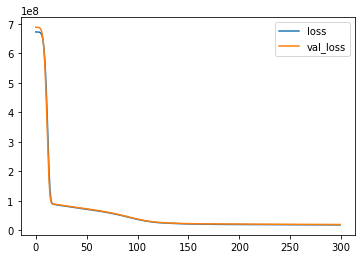

In [74]:
lossData.plot()
# birlikte hareket etmeleri bildigimiz gibi onemlidir

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
predArr = model.predict(x_test)

In [77]:
predArr

array([[22301.055],
       [23396.824],
       [24864.725],
       ...,
       [26226.6  ],
       [16093.869],
       [24733.256]], dtype=float32)

In [79]:
mean_absolute_error(y_test,predArr)
# aralarindaki fark

3171.13253358954

In [80]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


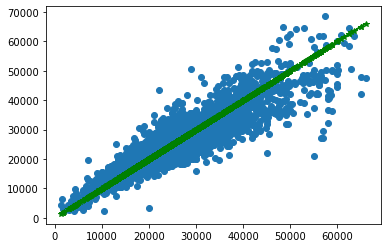

In [83]:
plt.scatter(y_test,predArr)
plt.plot(y_test,y_test,"g-*")

In [85]:
dataFrame.iloc[2]
# returns index=2

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [88]:
newCarSeries = dataFrame.drop("price",axis=1).iloc[2]

In [89]:
newCarSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [90]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1,5))

In [92]:
model.predict(newCarSeries)
# gercek degeri 65980, benim buldugum tahmin deger 62742

array([[62742.965]], dtype=float32)